# Image processing

   * [Preprocessing](#chapter5)
        * [Loading images](#section_5_1)
        * [Labelling](#section_5_1)
   * [Clustering](#chapter6)
        * [SIFT](#section_6_1)
            * [Parameter reduction, PCA](#section_6_1_1)
            * [Visualisation](#section_6_1_2)
            * [Kmeans](#section_6_1_3)
            * [Clustering analysis, confusion matrix](#section_6_1_4)
        * [Transfer learning, CNN](#section_6_2)

# Preprocessing <a class="anchor" id='chapter5' ></a>

# Loading Images <a class="anchor" id='section_5_1' ></a>

In [4]:
import pandas as pd

import os
working_directory = os.getcwd()
print(working_directory)

from os import listdir

#loading dataset
path2 = working_directory + '/Flipkart/Flipkart-Images/'
list_photos = [file for file in listdir(path2)]
print(len(list_photos))

/Users/jeaneudesdesgraviers/Downloads
8


In [5]:
path = working_directory + '/Flipkart/df_cleantext_prod.csv'
df = pd.read_csv(path)
df = df.drop('Unnamed: 0', axis = 1)

In [6]:
path3 = working_directory + '/Flipkart/df_cleantext_and_description_prod.csv'
df2 = pd.read_csv(path3)
df2 = df2.drop('Unnamed: 0', axis = 1)

In [7]:
check = df2.loc[df2['description'].str.contains("towel", case=False)]
check.head()

,clean_text_final,description,product_cat,image
1,cotton bath towel bath towel red yellow blue b...,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,7b72c92c2f6c40268628ec5f14c6d590.jpg
2,key cotton face towel set size small height in...,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,64d5d4a258243731dc7bbb1eef49ad74.jpg
468,key cotton hair towel size medium height inch ...,Key Features of Tks Cotton Hair Towel Size: Me...,Baby Care,948699ab8c947ce56c256f9cf7996761.jpg
651,cotton bath towel product,Buy Marvel Cotton Bath Towel at Rs. 449 at Fli...,Baby Care,705b90361aeda1849a728d80625a78a9.jpg
654,intellect bazaar cotton bath towel towel product,"Buy The Intellect Bazaar Cotton Bath Towel, Ba...",Baby Care,e1d8c5b60f9157f8e21c77cf795952f2.jpg


In [379]:
df.loc[df['image'].str.contains("1be8161a259813bca5d068d5730464e7", case=False)]

,clean_text_final,product_cat,image
424,key hair pack hair multicolor price set used h...,Beauty and Personal Care,1be8161a259813bca5d068d5730464e7.jpg


In [8]:
df_baby_care = df2.loc[df2.product_cat == 'Baby Care', :].head(50)
df_baby_care.head()

,clean_text_final,description,product_cat,image
1,cotton bath towel bath towel red yellow blue b...,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,7b72c92c2f6c40268628ec5f14c6d590.jpg
2,key cotton face towel set size small height in...,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,64d5d4a258243731dc7bbb1eef49ad74.jpg
40,key kid girl green top pyjama set fabric cotto...,Key Features of Mom and Kid Baby Girl's Printe...,Baby Care,90e56526f4c5892beac49f262b85150a.jpg
42,key kid girl blue grey top pyjama set fabric c...,Key Features of Mom and Kid Baby Girl's Printe...,Baby Care,5325213d84c80ad310b6e4b37a1ac824.jpg
63,key wine bag yellow wine bag yellow yellow gen...,Key Features of KOHL Wine Bag Yellow Easy to c...,Baby Care,f4e7f269319ba9cf5507a9e2febacbf5.jpg


In [9]:
df_baby_care.description.head()

1     Specifications of Sathiyas Cotton Bath Towel (...
2     Key Features of Eurospa Cotton Terry Face Towe...
40    Key Features of Mom and Kid Baby Girl's Printe...
42    Key Features of Mom and Kid Baby Girl's Printe...
63    Key Features of KOHL Wine Bag Yellow Easy to c...
Name: description, dtype: object

In [382]:
df.groupby("product_cat").count()

,clean_text_final,image
product_cat,,
Baby Care,150,150
Beauty and Personal Care,150,150
Computers,150,150
Home Furnishing,150,150
"Home, Decor, & Festive Needs",150,150
Kitchen & Dining,150,150
Watches,150,150


In [20]:
for (index,row) in df.iterrows():
    for label in list_labels:
        if row.product_cat == label:
            p = Path(f'/Users/jeaneudesdesgraviers/Downloads/Flipkart/Flipkart-Images/{label}/{row.image}')
            p.rename(Path(f'/Users/jeaneudesdesgraviers/Downloads/Flipkart/Flipkart-Images/{row.image}'))
            p.resolve()

In [399]:
from pathlib import Path

#list of category
list_labels = df.product_cat.unique().tolist()

#for (index,row) in df.iterrows():
   # for label in list_labels:
    #    if row.product_cat == label:
      #      p = Path(f'/Users/jeaneudesdesgraviers/Downloads/Flipkart/Flipkart-Images/{label}/{row.image}')
       #     p.rename(Path(f'/Users/jeaneudesdesgraviers/Downloads/Flipkart/Flipkart-Images/{row.image}'))
       #     p.resolve()
            
for (index,row) in df.iterrows():
    for label in list_labels:
        if row.product_cat == label:
            p = Path(f'/Users/jeaneudesdesgraviers/Downloads/Flipkart/Flipkart-Images/{row.image}')
            p.rename(Path(f'/Users/jeaneudesdesgraviers/Downloads/Flipkart/Flipkart-Images/{label}/{row.image}'))
            n = str(p)

Home Furnishing


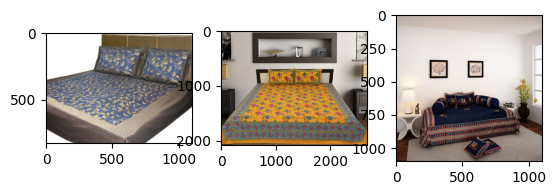

Baby Care


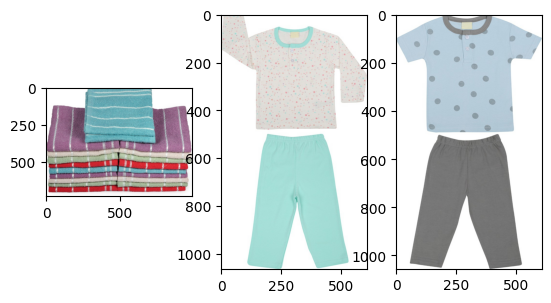

Watches


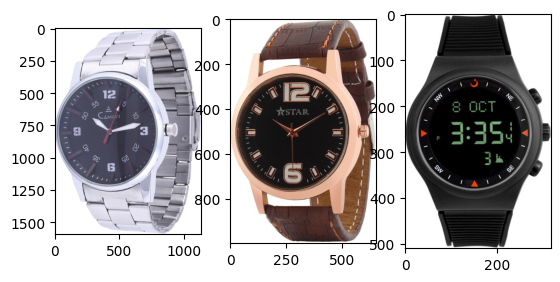

Home, Decor, & Festive Needs


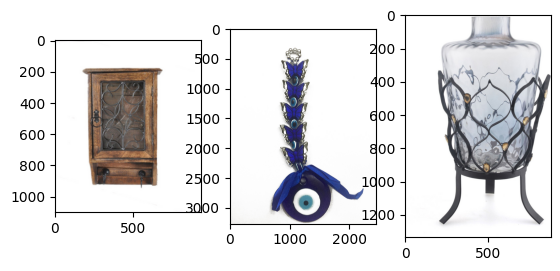

Kitchen & Dining


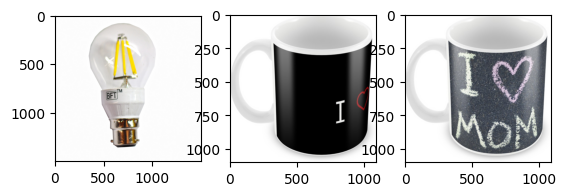

Beauty and Personal Care


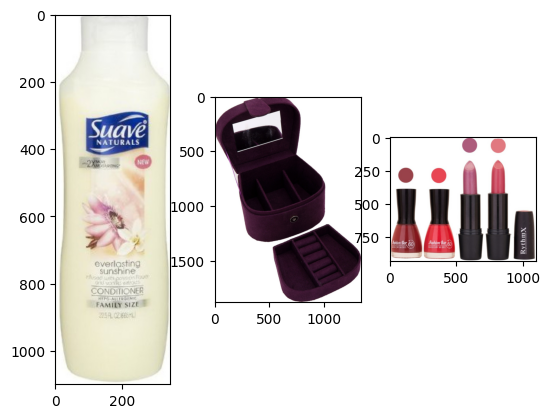

Computers


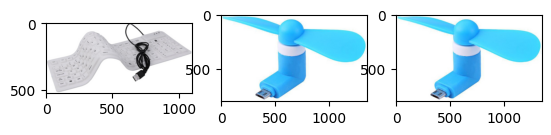

In [155]:
from matplotlib.image import imread
import matplotlib.pyplot as plt

def list_fct(name) :
    #get list of items per product category
    list_image_name = df.loc[df['product_cat'] == name, "image"].tolist()
    return list_image_name

#manually store product per categories in lists
list_baby= df.loc[df['product_cat'] == "Baby Care", "image"].tolist()
list_care= df.loc[df['product_cat'] == "Beauty and Personal Care", "image"].tolist()
list_computers= df.loc[df['product_cat'] == "Computers", "image"].tolist()
list_furnishing= df.loc[df['product_cat'] == "Home Furnishing", "image"].tolist()
list_Decor_Festive= df.loc[df['product_cat'] == "Home, Decor, & Festive Needs", "image"].tolist()
list_kitchen= df.loc[df['product_cat'] == "Kitchen & Dining", "image"].tolist()
list_watches= df.loc[df['product_cat'] == "Watches", "image"].tolist()

for name in list_labels :
    print(name)
    # print("-------")
    for i in range(3):
        plt.subplot(130 + 1 + i)
        #get path and get items from each lists of items
        filename = path2 + list_fct(name)[i+1]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

# Labelling <a class="anchor" id='section_5_2' ></a>

In [13]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df["label"] = le.fit_transform(df["product_cat"])
df

,clean_text_final,product_cat,image,label
0,key multicolor abstract eyelet door curtain fl...,Home Furnishing,55b85ea15a1536d46b7190ad6fff8ce7.jpg,3
1,cotton bath towel bath towel red yellow blue b...,Baby Care,7b72c92c2f6c40268628ec5f14c6d590.jpg,0
2,key cotton face towel set size small height in...,Baby Care,64d5d4a258243731dc7bbb1eef49ad74.jpg,0
3,key royal fashion cotton king royal wedding ro...,Home Furnishing,d4684dcdc759dd9cdf41504698d737d8.jpg,3
4,key print cotton floral king cotton print cott...,Home Furnishing,6325b6870c54cd47be6ebfbffa620ec7.jpg,3
...,...,...,...,...
1045,extra self sticker pack price sticker used big...,Baby Care,958f54f4c46b53c8a0a9b8167d9140bc.jpg,0
1046,vinyl sticker sticker pack price bring home wa...,Baby Care,fd6cbcc22efb6b761bd564c28928483c.jpg,0
1047,extra sticker extra sticker best price product,Baby Care,5912e037d12774bb73a2048f35a00009.jpg,0
1048,medium vinyl sticker sticker medium vinyl stic...,Baby Care,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,0


In [383]:
list_labels.append('.ipynb_checkpoints')
list_labels.append('.DS_Store')
list_photos = [photo for photo in list_photos if photo not in list_labels]

In [384]:
list_matching = [s for s in list_photos if ".jpg" in s]
#list_photos.pop(list_labels)

In [10]:
#list_matching

In [386]:
len(list_matching)

1050

# Clustering <a class="anchor" id='chapter6' ></a>

# SIFT <a class="anchor" id='section_6_1' ></a>

In [17]:
import cv2
import matplotlib.pyplot as plt

from sklearn import cluster, metrics

import time

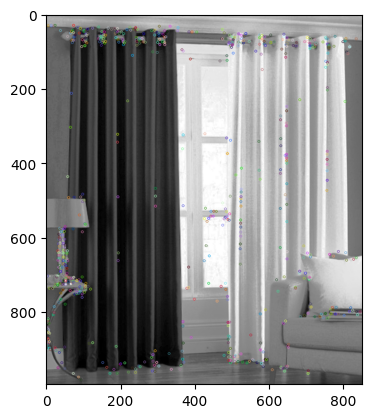

Descripteurs :  (727, 128)

[[ 11.  31.  84. ...   5.   0.   0.]
 [  0.   0.   0. ...   4.  52.  28.]
 [ 15.  49. 134. ...   0.   0.   0.]
 ...
 [ 22.   6.   0. ...  47.   0.   0.]
 [ 30.   2.   0. ...   0.   0.   2.]
 [ 47.   3.   0. ...   4.   1.   7.]]


In [167]:
## identification of key points and associated descriptors, turning images into matrices

sift = cv2.SIFT_create()
for photo in range(820,822):
    image = cv2.imread(path2+list_matching[photo],0) # convert in gray
    image = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(image, None)
    img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

In [20]:
#comparing calculation time

sift_keypoints = []
temps1=time.time()
sift = cv2.SIFT_create(500)

for image_num in range(len(list_matching)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path2+list_matching[image_num],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000


/var/folders/gs/0bx6d0ms3jxfgjd6vfkz22l40000gn/T/ipykernel_7906/3639163766.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sift_keypoints_by_img = np.asarray(sift_keypoints)



Nombre de descripteurs :  (517351, 128)
temps de traitement SIFT descriptor :           539.34 secondes


In [40]:
sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

/var/folders/gs/0bx6d0ms3jxfgjd6vfkz22l40000gn/T/ipykernel_29606/1791958001.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sift_keypoints_by_img = np.asarray(sift_keypoints)



Nombre de descripteurs :  (517351, 128)
temps de traitement SIFT descriptor :          3515.68 secondes


In [80]:
# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=2000, init_size=3*2000, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  719
Création de 719 clusters de descripteurs ...
temps de traitement kmeans :            18.78 secondes


In [81]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             8.12 secondes


# PCA <a class="anchor" id='section_6_1_1' ></a>

In [82]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
# 0.99 permet de perdre un minimmum de variance expliquée et donc perdre peu d'informmation.
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 2000)
Dimensions dataset après réduction PCA :  (1050, 828)


In [2]:
# reduction de dimension avec le t-sne qui va nous permettre comme avec une PCA de représenter les n features des images en 2 composantes
# On fait d'abord une reduction de dimension avec le PCA puis on effectue une reduction de dimension avec le t-sne. Cela va diminuer le temps de traitement.
# En utilisant seulement le t-sne le temps de traitemment sera plus long bien que le PCA réduise de peu le nombre de dimension au premier abord.
# Plus il y a de features, plus le gain de temps sur le temps de traitement sera interressant

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = df["label"]
print(df_tsne.shape)

NameError: name 'feat_pca' is not defined

# Visualisation <a class="anchor" id='section_6_1_2' ></a>

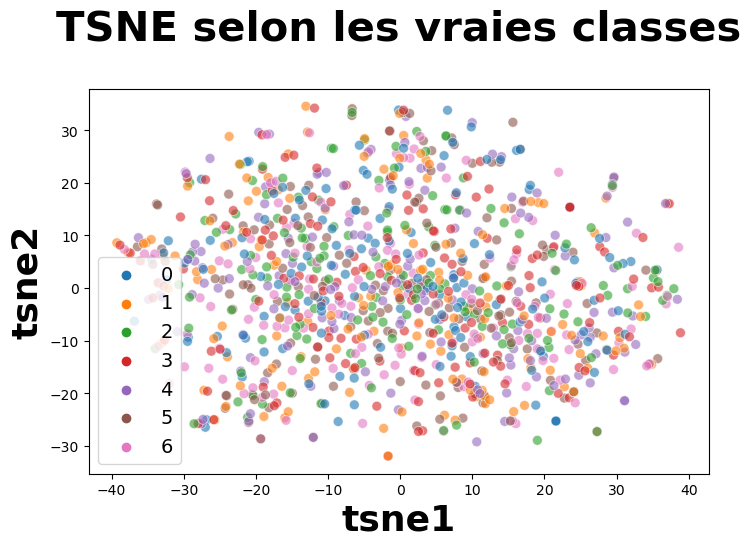

In [84]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14})

plt.show()

In [ ]:
# On voit qu'il est difficile d'identifier visuellement des cluster en fonction des catégories
# Par conséquent les resultats du clustering à l'aide du kmeans risquent d'etre peu efficaces

# Kmeans <a class="anchor" id='section_6_1_3' ></a>

In [112]:
cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)
df_tsne["class"].nunique()

(1050, 4)


7

In [113]:
df["label"].nunique()

7

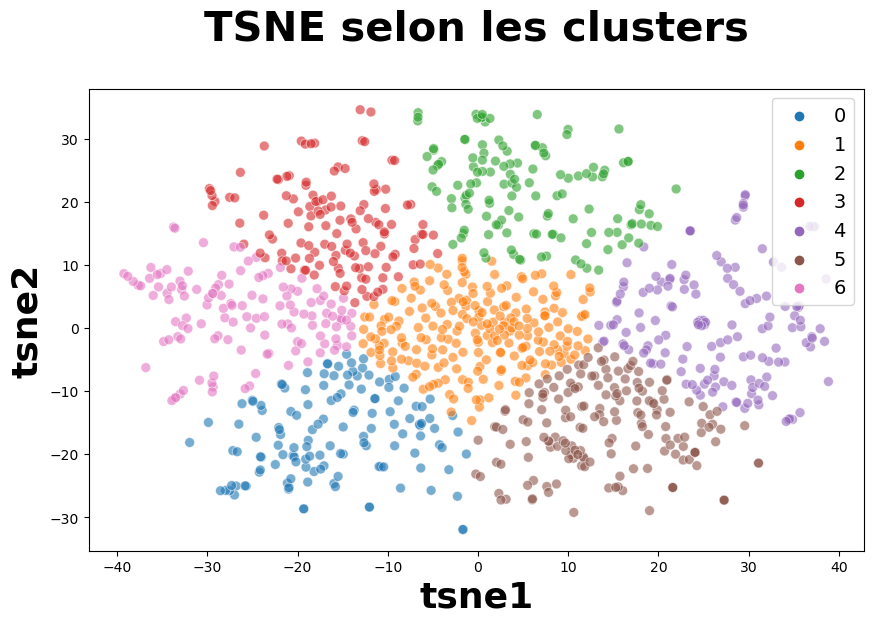

ARI :  -0.0010871835229813531


In [114]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = df["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

In [ ]:
# effectivement l'ARI est très mauvais

# Clustering analysis, confusion matrix <a class="anchor" id='section_6_1_4' ></a>

In [88]:
# Analyse par classe

#La matrice de confusion doit être transformée pour avoir en colonne le même ordre des catégories supposées qu'en ligne

In [11]:
#df_tsne

In [116]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    133
1    216
2    131
3    128
4    147
5    168
6    127
Name: class, dtype: int64

In [117]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[17 39 23 17 18 18 18]
 [21 30 18 15 16 28 22]
 [17 33 19 24 23 17 17]
 [20 28 15 22 27 24 14]
 [15 27 20 18 23 24 23]
 [18 32 22 17 17 28 16]
 [25 27 14 15 23 29 17]]


In [118]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    # corresp = np.argmax(conf_mat, axis=0)
    corresp = [6,5,4,3, 1, 2, 0]
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [6, 5, 4, 3, 1, 2, 0]
[[18 18 18 17 23 39 17]
 [22 16 28 15 18 30 21]
 [17 23 17 24 19 33 17]
 [14 27 24 22 15 28 20]
 [23 23 24 18 20 27 15]
 [16 17 28 17 22 32 18]
 [17 23 29 15 14 27 25]]

              precision    recall  f1-score   support

           0       0.14      0.12      0.13       150
           1       0.11      0.11      0.11       150
           2       0.10      0.11      0.11       150
           3       0.17      0.15      0.16       150
           4       0.15      0.13      0.14       150
           5       0.15      0.21      0.17       150
           6       0.19      0.17      0.18       150

    accuracy                           0.14      1050
   macro avg       0.14      0.14      0.14      1050
weighted avg       0.14      0.14      0.14      1050



<AxesSubplot: >

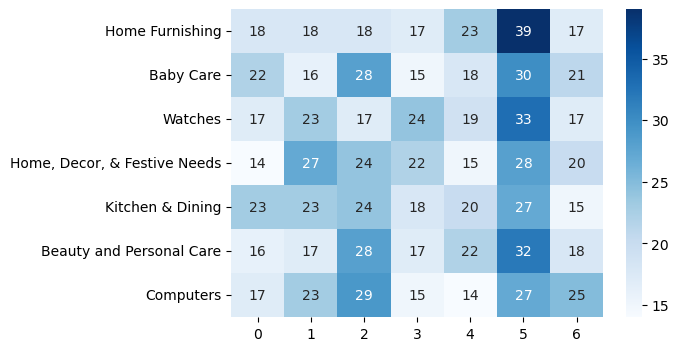

In [119]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

In [ ]:
# le plus gros cluster (celui du milieux graphiquemment: 1) regroupe le plus d'individus
# dans ce cluster il y a la plus grande part de individus appartenant à la catégorie "home furnishing".
# Cependant la plupart des autres catégories ont aussi la plus grande part de leurs individus assignés à ce cluster.

In [120]:
print(metrics.classification_report(labels, cls_labels_transform))

              precision    recall  f1-score   support

           0       0.14      0.12      0.13       150
           1       0.11      0.11      0.11       150
           2       0.10      0.11      0.11       150
           3       0.17      0.15      0.16       150
           4       0.15      0.13      0.14       150
           5       0.15      0.21      0.17       150
           6       0.19      0.17      0.18       150

    accuracy                           0.14      1050
   macro avg       0.14      0.14      0.14      1050
weighted avg       0.14      0.14      0.14      1050



In [ ]:
# En supposant qu'on pourrait réaffecter les individus à leur cluster, on arriverait donc à une accuracy de 0.14.
# Cependant, commpte tenu des faibles résultats, 
# il semble faux de dire qu'un cluster est bien défini et qu'il correspondrait à la dite catégorie:
# Ce n'est pas parcequ'il y a 39 individus en home furnishing dans le cluster 5, que ce cluster est bien celui du "homme furnishing".

In [ ]:
# Le SIFT fonctionne donc mal. Y a t'il d'autres methodes pour mieux distinguer les differentes classes ?

# CNN, transfer learning <a class="anchor" id='section_6_2' ></a>

In [159]:
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split

In [160]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [407]:
df["path"] = df.apply(lambda x: f'/Users/jeaneudesdesgraviers/Downloads/Flipkart/Flipkart-Images/{x.product_cat}/{x.image}', axis=1)
df.path

0       /Users/jeaneudesdesgraviers/Downloads/Flipkart...
1       /Users/jeaneudesdesgraviers/Downloads/Flipkart...
2       /Users/jeaneudesdesgraviers/Downloads/Flipkart...
3       /Users/jeaneudesdesgraviers/Downloads/Flipkart...
4       /Users/jeaneudesdesgraviers/Downloads/Flipkart...
                              ...                        
1045    /Users/jeaneudesdesgraviers/Downloads/Flipkart...
1046    /Users/jeaneudesdesgraviers/Downloads/Flipkart...
1047    /Users/jeaneudesdesgraviers/Downloads/Flipkart...
1048    /Users/jeaneudesdesgraviers/Downloads/Flipkart...
1049    /Users/jeaneudesdesgraviers/Downloads/Flipkart...
Name: path, Length: 1050, dtype: object

In [162]:
product_cat_list = df.product_cat.unique().tolist()
#label_list = df.label.unique().tolist()

In [163]:
df.loc[df.product_cat == 'Home Furnishing', df.image]

KeyError: "None of [Index(['55b85ea15a1536d46b7190ad6fff8ce7.jpg',\n       '7b72c92c2f6c40268628ec5f14c6d590.jpg',\n       '64d5d4a258243731dc7bbb1eef49ad74.jpg',\n       'd4684dcdc759dd9cdf41504698d737d8.jpg',\n       '6325b6870c54cd47be6ebfbffa620ec7.jpg',\n       '893aa5ed55f7cff2eccea7758d7a86bd.jpg',\n       'f355cc1ccb08bd0d283ed979b7ee7515.jpg',\n       'dd0e3470a7e6ed76fd69c2da27721041.jpg',\n       '41384da51732c0b4df3de8f395714fbb.jpg',\n       '710ed5f2393a4b9e8823aa0029f71f93.jpg',\n       ...\n       '3b465b02720ef7c930cb2e065a8fc05d.jpg',\n       'b1644f47c7dfa58f8c06677f2a27ee09.jpg',\n       '057836ecde71565f8ebdd576e41fdc96.jpg',\n       '38782cce965307ddcdbedfcb7fa409c3.jpg',\n       'be0f39341d771aac57084970f1ed6425.jpg',\n       '958f54f4c46b53c8a0a9b8167d9140bc.jpg',\n       'fd6cbcc22efb6b761bd564c28928483c.jpg',\n       '5912e037d12774bb73a2048f35a00009.jpg',\n       'c3edc504d1b4f0ba6224fa53a43a7ad6.jpg',\n       'f2f027ad6a6df617c9f125173da71e44.jpg'],\n      dtype='object', length=1050)] are in the [columns]"

In [387]:
df.image

0       55b85ea15a1536d46b7190ad6fff8ce7.jpg
1       7b72c92c2f6c40268628ec5f14c6d590.jpg
2       64d5d4a258243731dc7bbb1eef49ad74.jpg
3       d4684dcdc759dd9cdf41504698d737d8.jpg
4       6325b6870c54cd47be6ebfbffa620ec7.jpg
                        ...                 
1045    958f54f4c46b53c8a0a9b8167d9140bc.jpg
1046    fd6cbcc22efb6b761bd564c28928483c.jpg
1047    5912e037d12774bb73a2048f35a00009.jpg
1048    c3edc504d1b4f0ba6224fa53a43a7ad6.jpg
1049    f2f027ad6a6df617c9f125173da71e44.jpg
Name: image, Length: 1050, dtype: object

In [137]:
import pathlib

data_dir = Path('/Users/jeaneudesdesgraviers/Downloads/Flipkart/Flipkart-Images')
data_dir2 = '/Users/jeaneudesdesgraviers/Downloads/Flipkart/Flipkart-Images'

In [75]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/Users/jeaneudesdesgraviers/Downloads/Flipkart/Flipkart-Images/.ipynb_checkpoints/1738ddb8f47f11ff0cb96fe6cad302c2-checkpoint.jpg'),
 PosixPath('/Users/jeaneudesdesgraviers/Downloads/Flipkart/Flipkart-Images/.ipynb_checkpoints/f54d0c5cbd8e2270742293edf9075cb1-checkpoint.jpg')]

In [114]:
df.iloc[2,3]

'/Users/jeaneudesdesgraviers/Downloads/Flipkart/Flipkart-Images/Baby Care/64d5d4a258243731dc7bbb1eef49ad74.jpg'

In [24]:
product_cat_list

['Home Furnishing',
 'Baby Care',
 'Watches',
 'Home, Decor, & Festive Needs',
 'Kitchen & Dining',
 'Beauty and Personal Care',
 'Computers']

In [406]:
good_dict = df.groupby('product_cat')['path'].apply(list).to_dict()
good_dict

KeyError: 'Column not found: path'

In [173]:
image_label_dict = {'Home Furnishing': 0,
 'Baby Care': 1,
 'Watches': 2,
 'Home, Decor, & Festive Needs': 3,
 'Kitchen & Dining': 4,
 'Beauty and Personal Care': 5,
 'Computers': 6}

In [168]:
cv2.resize(img, (224,224)).shape

(224, 224, 3)

In [170]:
good_dict

{'Baby Care': ['/Users/jeaneudesdesgraviers/Downloads/Flipkart/Flipkart-Images/Baby Care/7b72c92c2f6c40268628ec5f14c6d590.jpg',
  '/Users/jeaneudesdesgraviers/Downloads/Flipkart/Flipkart-Images/Baby Care/64d5d4a258243731dc7bbb1eef49ad74.jpg',
  '/Users/jeaneudesdesgraviers/Downloads/Flipkart/Flipkart-Images/Baby Care/90e56526f4c5892beac49f262b85150a.jpg',
  '/Users/jeaneudesdesgraviers/Downloads/Flipkart/Flipkart-Images/Baby Care/5325213d84c80ad310b6e4b37a1ac824.jpg',
  '/Users/jeaneudesdesgraviers/Downloads/Flipkart/Flipkart-Images/Baby Care/f4e7f269319ba9cf5507a9e2febacbf5.jpg',
  '/Users/jeaneudesdesgraviers/Downloads/Flipkart/Flipkart-Images/Baby Care/903d63e2b71d692ccd628e1de516516e.jpg',
  '/Users/jeaneudesdesgraviers/Downloads/Flipkart/Flipkart-Images/Baby Care/141d2b743c477043041faddf9233c8ad.jpg',
  '/Users/jeaneudesdesgraviers/Downloads/Flipkart/Flipkart-Images/Baby Care/7a3f11f380a1bf85338ab3771ff81e9f.jpg',
  '/Users/jeaneudesdesgraviers/Downloads/Flipkart/Flipkart-Images/B

In [440]:
X, y = [], []

for product_cat, images in good_dict.items():
    for image in images:
        img = cv2.imread(str(image))
            
        if img is None:
            print('Wrong path')
        else:
            
            resized_img = cv2.resize(img,(224,224))
            X.append(resized_img)
            y.append(image_label_dict[product_cat])

In [ ]:
# X

In [460]:
import numpy as np

X = np.array(X)
y = np.array(y)

In [461]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [450]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [432]:
IMAGE_SHAPE = (224, 224)

x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

In [413]:
classifier = tf.keras.Sequential([hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))])
    
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 674ms/step


array([710, 795, 557])

In [201]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [202]:
num_of_product_cat = 7

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_product_cat)
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_9 (Dense)             (None, 7)                 8967      
                                                                 
Total params: 2,266,951
Trainable params: 8,967
Non-trainable params: 2,257,984
_________________________________________________________________


In [210]:
y_train

array([2, 5, 1, 2, 6, 2, 3, 6, 5, 0, 6, 4, 0, 2, 2, 3, 6, 1, 1, 5, 2, 5,
       3, 6, 1, 0, 3, 0, 3, 5, 1, 5, 2, 1, 2, 4, 0, 5, 1, 3, 5, 6, 2, 4,
       0, 0, 3, 1, 5, 2, 6, 6, 0, 6, 4, 0, 5, 3, 3, 4, 0, 2, 4, 1, 2, 6,
       5, 5, 3, 5, 6, 4, 2, 3, 5, 0, 0, 4, 1, 1, 1, 1, 2, 4, 3, 5, 3, 0,
       6, 4, 2, 2, 2, 5, 1, 0, 2, 6, 0, 5, 6, 1, 1, 5, 0, 6, 1, 5, 1, 1,
       6, 5, 2, 3, 4, 4, 6, 1, 2, 1, 6, 3, 1, 2, 3, 0, 2, 0, 6, 1, 1, 5,
       6, 1, 1, 5, 0, 5, 3, 6, 0, 2, 5, 2, 3, 6, 2, 4, 6, 6, 1, 2, 5, 0,
       6, 5, 0, 2, 6, 6, 5, 0, 5, 5, 2, 1, 6, 4, 0, 6, 1, 0, 6, 6, 5, 6,
       6, 2, 0, 2, 2, 4, 0, 2, 1, 3, 4, 3, 5, 5, 3, 1, 1, 5, 2, 6, 4, 2,
       3, 1, 0, 6, 3, 3, 1, 4, 0, 4, 0, 6, 4, 1, 0, 5, 5, 5, 5, 5, 2, 4,
       4, 6, 4, 2, 2, 2, 4, 5, 0, 2, 4, 1, 0, 1, 3, 5, 5, 5, 5, 0, 0, 3,
       5, 3, 6, 1, 3, 3, 5, 6, 3, 5, 6, 6, 4, 2, 3, 5, 0, 0, 4, 1, 0, 1,
       6, 0, 1, 6, 5, 3, 0, 3, 5, 3, 0, 0, 6, 5, 6, 3, 6, 0, 3, 6, 1, 5,
       6, 3, 2, 4, 4, 1, 3, 0, 1, 1, 3, 3, 1, 0, 6,

Epoch 1/10
23/23 [==============================] - 13s 488ms/step - loss: 1.6068 - acc: 0.4138 - val_loss: 1.0960 - val_acc: 0.6835
Epoch 2/10
23/23 [==============================] - 11s 476ms/step - loss: 0.7162 - acc: 0.7924 - val_loss: 0.8552 - val_acc: 0.7342
Epoch 3/10
23/23 [==============================] - 11s 468ms/step - loss: 0.5121 - acc: 0.8503 - val_loss: 0.8043 - val_acc: 0.7215
Epoch 4/10
23/23 [==============================] - 11s 478ms/step - loss: 0.4135 - acc: 0.8715 - val_loss: 0.7659 - val_acc: 0.7215
Epoch 5/10
23/23 [==============================] - 11s 483ms/step - loss: 0.3437 - acc: 0.9068 - val_loss: 0.7613 - val_acc: 0.6962
Epoch 6/10
23/23 [==============================] - 12s 538ms/step - loss: 0.2878 - acc: 0.9195 - val_loss: 0.7412 - val_acc: 0.7342
Epoch 7/10
23/23 [==============================] - 23s 1s/step - loss: 0.2420 - acc: 0.9449 - val_loss: 0.7116 - val_acc: 0.7595
Epoch 8/10
23/23 [==============================] - 25s 1s/step - loss: 

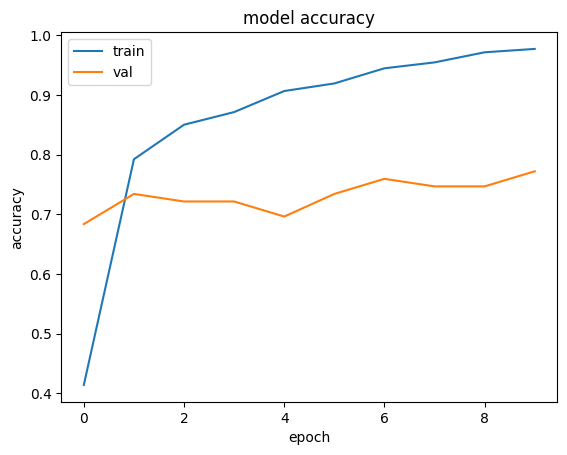

In [203]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

history = model.fit(X_train_scaled, y_train,validation_split = 0.1, epochs=10)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [142]:
model.evaluate(X_test_scaled,y_test)

9/9 [==============================] - 4s 389ms/step - loss: 0.6436 - acc: 0.8023


[0.6435898542404175, 0.802281379699707]

In [152]:
#ResNet50

In [186]:
classifier2 = tf.keras.Sequential([hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5", input_shape=IMAGE_SHAPE+(3,))])
    
predicted2 = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted2 = np.argmax(predicted2, axis=1)
predicted2

1/1 [==============================] - 0s 95ms/step


array([710, 795, 557])

In [187]:
feature_extractor_model2 = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"

pretrained_model_without_top_layer2 = hub.KerasLayer(
    feature_extractor_model2, input_shape=(224, 224, 3), trainable=False)

In [188]:
num_of_product_cat = 7

model2 = tf.keras.Sequential([
  pretrained_model_without_top_layer2,
  tf.keras.layers.Dense(num_of_product_cat)
])

model2.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_18 (KerasLayer)  (None, 2048)             23564800  
                                                                 
 dense_7 (Dense)             (None, 7)                 14343     
                                                                 
Total params: 23,579,143
Trainable params: 14,343
Non-trainable params: 23,564,800
_________________________________________________________________


Epoch 1/10
23/23 [==============================] - 37s 1s/step - loss: 1.4299 - acc: 0.5127 - val_loss: 0.7316 - val_acc: 0.7468
Epoch 2/10
23/23 [==============================] - 35s 2s/step - loss: 0.5477 - acc: 0.8249 - val_loss: 0.6276 - val_acc: 0.7722
Epoch 3/10
23/23 [==============================] - 36s 2s/step - loss: 0.3686 - acc: 0.8870 - val_loss: 0.5910 - val_acc: 0.8101
Epoch 4/10
23/23 [==============================] - 38s 2s/step - loss: 0.2696 - acc: 0.9237 - val_loss: 0.5605 - val_acc: 0.7975
Epoch 5/10
23/23 [==============================] - 36s 2s/step - loss: 0.2040 - acc: 0.9463 - val_loss: 0.5558 - val_acc: 0.8228
Epoch 6/10
23/23 [==============================] - 35s 2s/step - loss: 0.1582 - acc: 0.9703 - val_loss: 0.5557 - val_acc: 0.8101
Epoch 7/10
23/23 [==============================] - 36s 2s/step - loss: 0.1221 - acc: 0.9802 - val_loss: 0.5528 - val_acc: 0.8101
Epoch 8/10
23/23 [==============================] - 36s 2s/step - loss: 0.1044 - acc: 0.98

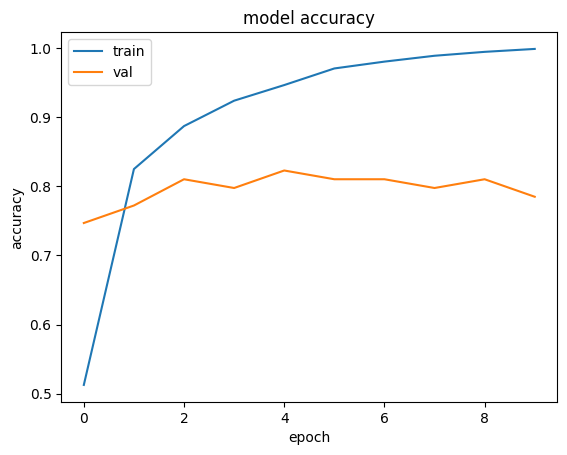

In [189]:
model2.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

history = model2.fit(X_train_scaled, y_train,validation_split = 0.1, epochs=10)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#Inception

1/1 [==============================] - 0s 87ms/step
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_16 (KerasLayer)  (None, 2048)             21802784  
                                                                 
 dense_6 (Dense)             (None, 7)                 14343     
                                                                 
Total params: 21,817,127
Trainable params: 14,343
Non-trainable params: 21,802,784
_________________________________________________________________
Epoch 1/10
23/23 [==============================] - 21s 771ms/step - loss: 1.3965 - acc: 0.5268 - val_loss: 0.9115 - val_acc: 0.6962
Epoch 2/10
23/23 [==============================] - 20s 854ms/step - loss: 0.6538 - acc: 0.7853 - val_loss: 0.6977 - val_acc: 0.7722
Epoch 3/10
23/23 [==============================] - 21s 934ms/step - loss: 0.4704 - acc: 0.8630 - val_loss: 0.5856

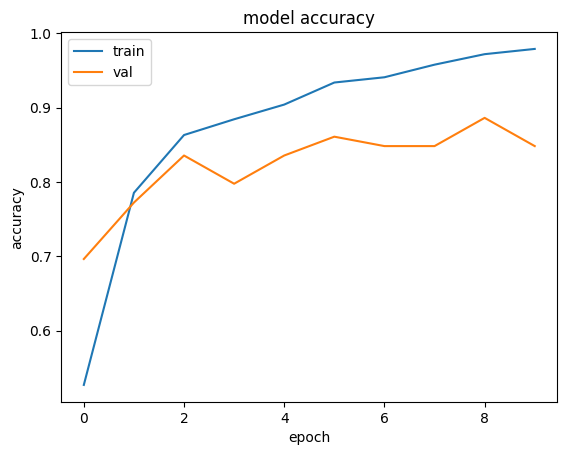

In [185]:
classifier3 = tf.keras.Sequential([hub.KerasLayer("https://tfhub.dev/google/tf2-preview/inception_v3/classification/4", input_shape=IMAGE_SHAPE+(3,))])
    
predicted3 = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted3 = np.argmax(predicted3, axis=1)
predicted3

feature_extractor_model3 = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4"

pretrained_model_without_top_layer3 = hub.KerasLayer(
    feature_extractor_model3, input_shape=(224, 224, 3), trainable=False)

model3 = tf.keras.Sequential([
  pretrained_model_without_top_layer3,
  tf.keras.layers.Dense(num_of_product_cat)
])

model3.summary()

model3.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

history = model3.fit(X_train_scaled, y_train,validation_split = 0.1, epochs=10)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Home made neural network

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
x_train =tf.keras.utils.normalize(X_train)
x_test =tf.keras.utils.normalize(X_test)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(7, activation = tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=30)

Epoch 1/30
25/25 [==============================] - 5s 176ms/step - loss: 33.1665 - accuracy: 0.1537
Epoch 2/30
25/25 [==============================] - 4s 176ms/step - loss: 10.2520 - accuracy: 0.1690
Epoch 3/30
25/25 [==============================] - 4s 179ms/step - loss: 6.6793 - accuracy: 0.1715
Epoch 4/30
25/25 [==============================] - 4s 171ms/step - loss: 3.7191 - accuracy: 0.2122
Epoch 5/30
25/25 [==============================] - 4s 169ms/step - loss: 3.8922 - accuracy: 0.2071
Epoch 6/30
25/25 [==============================] - 4s 179ms/step - loss: 3.2692 - accuracy: 0.1982
Epoch 7/30
25/25 [==============================] - 4s 171ms/step - loss: 2.7166 - accuracy: 0.2313
Epoch 8/30
25/25 [==============================] - 4s 175ms/step - loss: 2.8382 - accuracy: 0.2084
Epoch 9/30
25/25 [==============================] - 4s 170ms/step - loss: 2.6772 - accuracy: 0.2389
Epoch 10/30
25/25 [==============================] - 4s 173ms/step - loss: 2.4459 - accuracy: 0.23

In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

9/9 [==============================] - 0s 13ms/step - loss: 1.9989 - accuracy: 0.2319
1.9988818168640137 0.2319391667842865


In [ ]:
len(y_test)

263

In [160]:
predictions = model.predict([x_test])

9/9 [==============================] - 0s 12ms/step


In [171]:
np.argmax(predictions[5])

1

In [2]:
plt.imshow(x_test[5])

#image_label_dict = {'Home Furnishing': 0,
# 'Baby Care': 1,
# 'Watches': 2,
# 'Home, Decor, & Festive Needs': 3,
# 'Kitchen & Dining': 4,
# 'Beauty and Personal Care': 5,
# 'Computers': 6}

NameError: name 'plt' is not defined

In [ ]:
# The Transfer learning seems to be an efficient technique for our use case. Indeed CNN can work well for small dataset like ours.
# With only the feature extraction we can achieve classification score around .85 with 10 epochs. We could raise this score with more epochs training.
# Adjusting the model on our dataset and freezing layers could optimize our score even better.